In [1]:
! pip install -q -U tensor-sensor

In [2]:
import tsensor
tsensor.__version__

'0.1b1'

### NumPy

In [52]:
import numpy as np

n = 200         # number of instances
d = 764         # number of instance features
n_neurons = 100 # how many neurons in this layer?

W = np.random.rand(d,n_neurons)
b = np.random.rand(n_neurons,1)
X = np.random.rand(n,d)
Y = W @ X.T + b  

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 764 is different from 100)

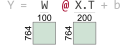

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 764 is different from 100)
Cause: @ on tensor operand W w/shape (764, 100) and operand X.T w/shape (764, 200)

In [59]:
import tsensor
W = np.random.rand(d,n_neurons)
b = np.random.rand(n_neurons,1)
X = np.random.rand(n,d)
with tsensor.clarify() as c:
    Y = W @ X.T + b

In [62]:
c.view.savefig("/tmp/t.svg")

In [ ]:
tsensor.astviz("Y = W @ X.T + b")

### PyTorch

In [10]:
import torch

n = 200         # number of instances
d = 764         # number of instance features
n_neurons = 100 # how many neurons in this layer?

W = torch.rand(d,n_neurons)
b = torch.rand(n_neurons,1)
X = torch.rand(n,d)
Y = W @ X.T + b  # compute output for one hidden-layer

RuntimeError: size mismatch, m1: [764 x 100], m2: [764 x 200] at /tmp/pip-req-build-as628lz5/aten/src/TH/generic/THTensorMath.cpp:41

In [ ]:
with tsensor.clarify() as c:
    Y = W @ X.T + b

In [ ]:
c.view.savefig("/tmp/torch-mm.svg")

### TensorFlow

In [ ]:
import tensorflow as tf

n = 200         # number of instances
d = 764         # number of instance features
n_neurons = 100 # how many neurons in this layer?

W = tf.random.uniform((d,n_neurons))
b = tf.random.uniform((n_neurons,1))
X = tf.random.uniform((n,d))
Y = W @ tf.transpose(X) + b  # compute output for one hidden-layer

In [ ]:
with tsensor.clarify():
    Y = W @ tf.transpose(X) + b

In [ ]:
tsensor.astviz("Y = W @ tf.transpose(X) + b")

## Sim GRU

In [ ]:
nhidden = 256
Whh_ = torch.eye(nhidden, nhidden)
Uxh_ = torch.randn(d, nhidden)
bh_  = torch.zeros(nhidden, 1)
X = torch.rand(n,d)         # fake input

with tsensor.clarify() as c:
    h = torch.zeros(nhidden, 1) # fake previous hidden state h
    r = torch.zeros(nhidden, 1) # fake this computation
    h_ = torch.tanh(Whh_ @ (r*h) + Uxh_ @ X.T + bh_)

In [ ]:
c.view.savefig("/tmp/torch-gru.png")

## Make class wrapper

In [ ]:
class Linear:
    def __init__(self, d, n_neurons):
        self.W = torch.randn(n_neurons, d)
        self.b = torch.zeros(n_neurons, 1)
    def __call__(self, input):
        return self.W @ input + self.b

In [ ]:
import torch

n = 200         # number of instances
d = 764         # number of instance features
n_neurons = 100 # how many neurons in this layer?

In [ ]:
L = Linear(d,n_neurons)
X = torch.rand(n,d)

with tsensor.clarify() as c:
    Y = L(X)

In [ ]:
c.view.savefig('/tmp/t.svg')

## Use nn.Linear

In [ ]:
L = torch.nn.Linear(d, n_neurons)
X = torch.rand(n,n)
with tsensor.clarify() as c:
    Y = L(X)

## Batch, 3D tensors

In [20]:
class Linear:
    def __init__(self, d, n_neurons):
        self.W = torch.randn(n_neurons, d)
        self.b = torch.zeros(n_neurons, 1)
    def __call__(self, input):
        return self.W @ input.T + self.b

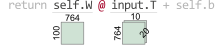

RuntimeError: size mismatch, m1: [15280 x 10], m2: [764 x 100] at /tmp/pip-req-build-as628lz5/aten/src/TH/generic/THTensorMath.cpp:41
Cause: @ on tensor operand self.W w/shape [100, 764] and operand input.T w/shape [764, 10, 20]

In [21]:
L = Linear(d,n_neurons) # With correct equation

batch_size = 10
n_batches = n // batch_size
X = torch.rand(n_batches,batch_size,d)

with tsensor.clarify() as c:
    for i in range(n_batches):
        Y = L(X) # Oops! Should pass batch X[i]

In [17]:
c.view.savefig('/tmp/t.svg')

### Try to get 4D

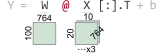

RuntimeError: size mismatch, m1: [45840 x 10], m2: [764 x 100] at /tmp/pip-req-build-as628lz5/aten/src/TH/generic/THTensorMath.cpp:41
Cause: @ on tensor operand W w/shape [100, 764] and operand X[:].T w/shape [3, 764, 10, 20]

In [51]:
W = torch.rand(n_neurons,d)
b = torch.rand(n_neurons,1)
batch_size = 10
n_batches = n // batch_size
X = torch.rand(n_batches,batch_size,d,3)

with tsensor.clarify() as c:
    Y = W @ X[:].T + b

In [39]:
c.views[0].savefig('/tmp/t.svg')

##  horizontal and vertical vectors

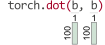

RuntimeError: 1D tensors expected, got 2D, 2D tensors at /tmp/pip-req-build-as628lz5/aten/src/TH/generic/THTensorEvenMoreMath.cpp:83
Cause: torch.dot(b,b) tensor arg b w/shape [100, 1], arg b w/shape [100, 1]

In [44]:
b = torch.rand(n_neurons,1)
with tsensor.clarify() as c:
    torch.dot(b, b)

In [45]:
c.view.savefig('/tmp/t.svg')

##  Explain

This one is subtle. We use explain to figure out why we get the wrong answer even though there's no exception.

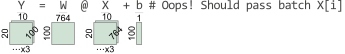

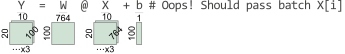

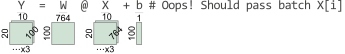

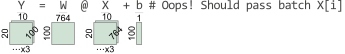

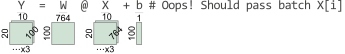

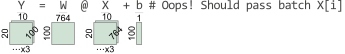

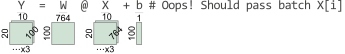

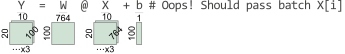

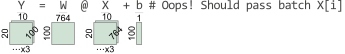

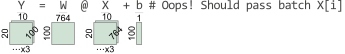

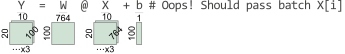

AttributeError: 'KeyboardInterrupt' object has no attribute 'message'

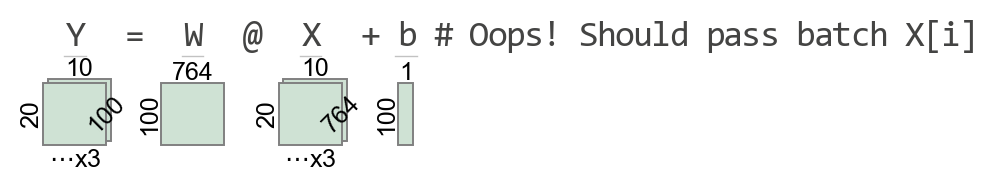

In [14]:
W = torch.rand(n_neurons,d)
b = torch.rand(n_neurons,1)
batch_size = 10
n_batches = n // batch_size
X = torch.rand(n_batches,batch_size,d,3)

for i in range(n_batches):
    with tsensor.explain() as c:
        Y = W @ X + b # Oops! Should pass batch X[i]

In [15]:
Y.shape, d, n_neurons, n, (W @ X).shape

(torch.Size([20, 10, 100, 3]), 764, 100, 200, torch.Size([20, 10, 100, 3]))